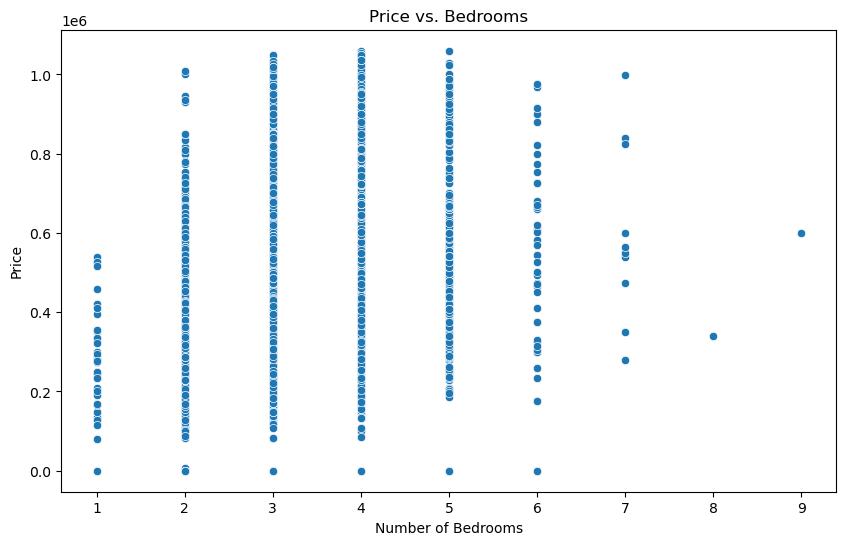

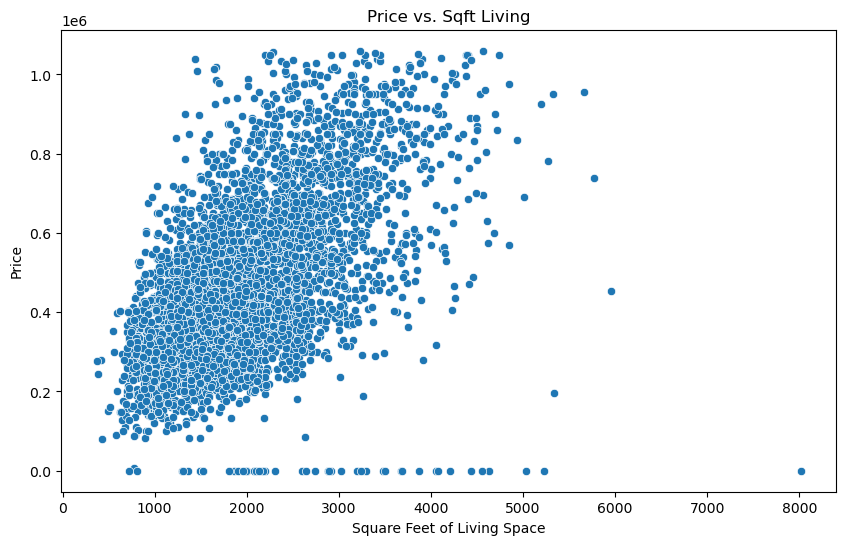

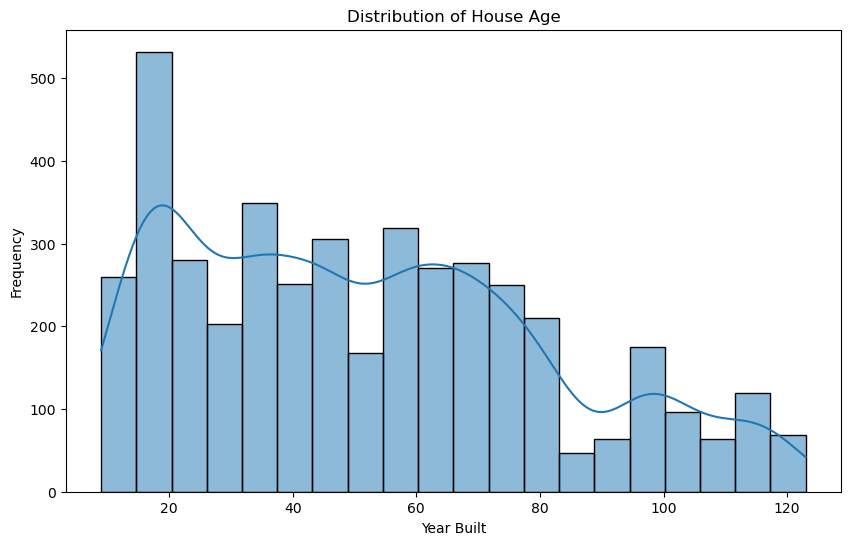

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'dataset/cleaned_data.csv'

# Load the dataset
data_fillmean = pd.read_csv(file_path)

# Scatter plot for Price vs Bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_fillmean, x='bedrooms', y='price')
plt.title('Price vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()



plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_fillmean, x='sqft_living', y='price')
plt.title('Price vs. Sqft Living')
plt.xlabel('Square Feet of Living Space')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_fillmean['house_age'], bins=20, kde=True)
plt.title('Distribution of House Age')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# Convert date to datetime if not already done
data_fillmean['date'] = pd.to_datetime(data_fillmean['date'])
data_fillmean['year'] = data_fillmean['date'].dt.year





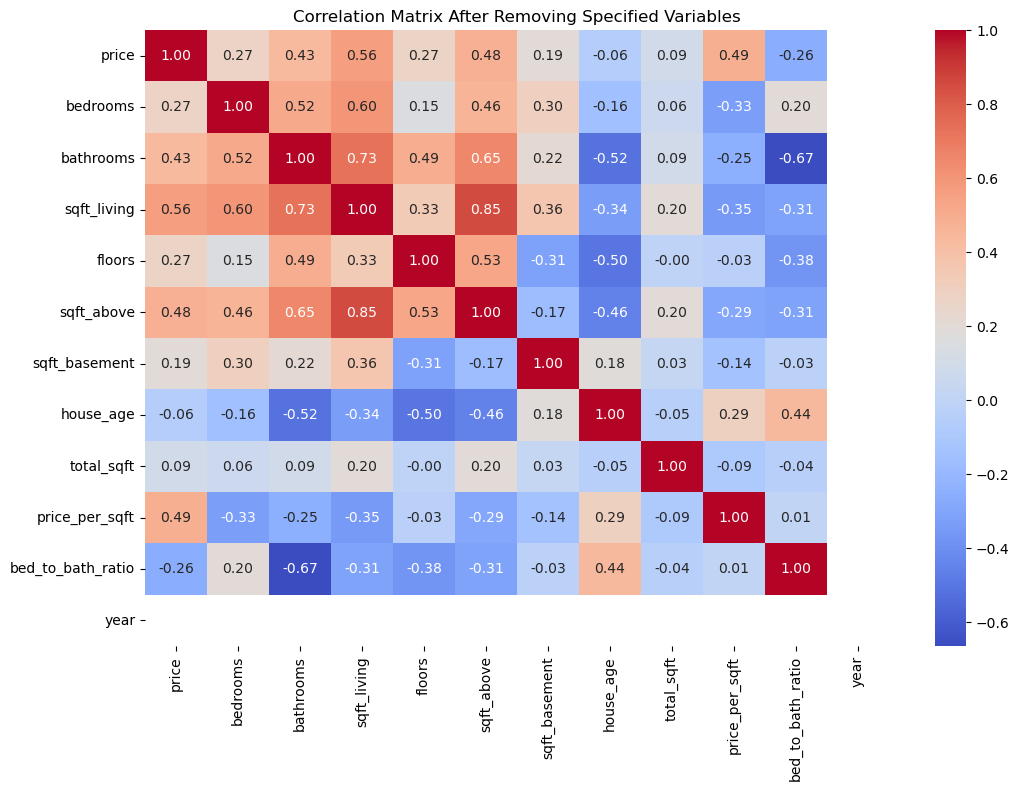

In [38]:
import numpy as np
# Drop non-numeric columns which cannot be used in correlation calculation
numeric_data = data_fillmean.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Removing Specified Variables')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardizing the features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principal_components = pca.fit_transform(numeric_scaled)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the PCA DataFrame
print(pca_df.head())


   Principal Component 1  Principal Component 2  Principal Component 3
0              -1.312868              -0.483901              -0.534404
1              -0.282678               0.055349              -0.752929
2               0.244473               1.947595              -0.388069
3               0.524208               1.740003               0.168513
4              -2.550650              -0.196901               2.528903


Explained Variance Ratio: [0.2066706  0.19719263 0.17451687]


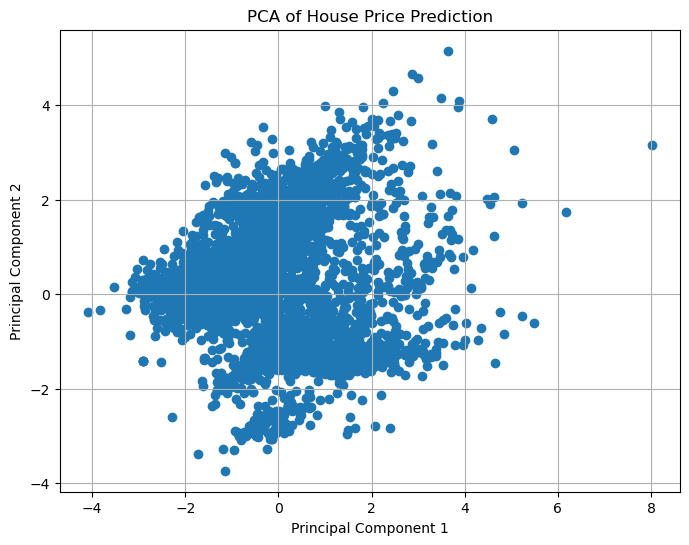

                         PC1           PC2           PC3
price           3.809135e-01  2.258672e-02  6.518782e-01
sqft_basement   2.393998e-01  6.245013e-01  1.313265e-02
house_age      -4.470543e-01  4.062319e-01  2.222157e-01
total_sqft      2.338077e-01  2.174858e-02  2.518134e-02
price_per_sqft -2.624605e-01 -6.103236e-02  6.933193e-01
year           -6.938894e-18  3.330669e-16 -1.387779e-17
PC1             6.572993e-01 -1.160845e-01  1.830927e-02
PC2             6.786404e-02  6.144003e-01 -1.197174e-01
PC3             1.118970e-01  1.784704e-02  1.716989e-01
PC4             1.581606e-01  2.213228e-01  5.361070e-03


In [56]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of House Price Prediction')
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=numeric_data.columns)
print(loadings)

In [57]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data_fillmean' is already loaded and is your DataFrame
# Selecting the independent variables and the target variable
X = data_fillmean[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'floors']]
y = data_fillmean['price']

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     422.0
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        23:28:24   Log-Likelihood:                -58043.
No. Observations:                4307   AIC:                         1.161e+05
Df Residuals:                    4301   BIC:                         1.161e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.742e+05   2628.311    180.438      

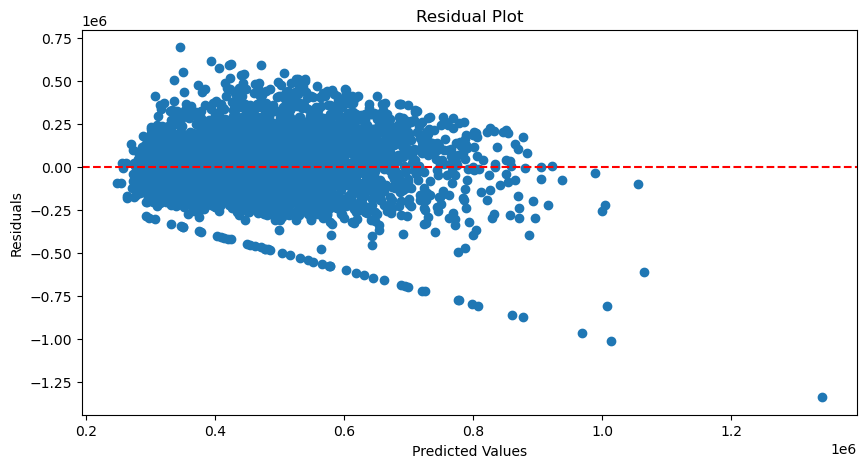

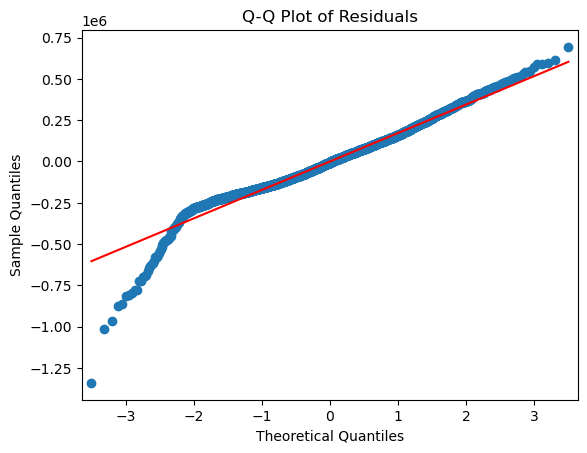

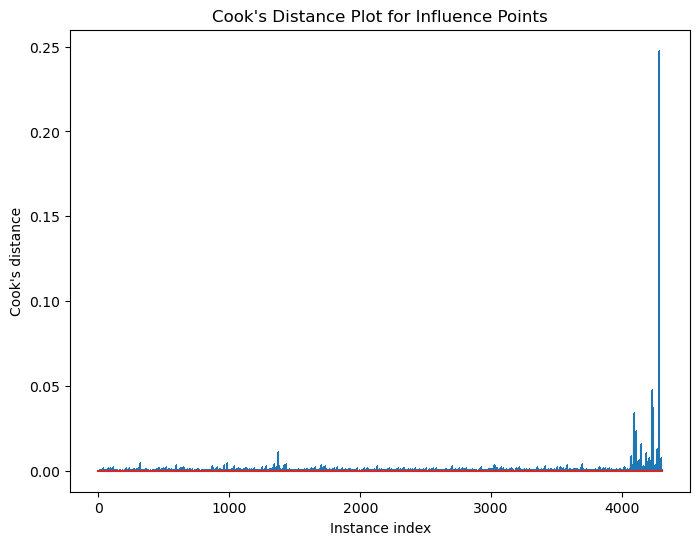

In [58]:
# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q plot for normality
fig = sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Checking for the influence of points
from statsmodels.stats.outliers_influence import OLSInfluence
test = OLSInfluence(model).summary_frame()

fig, ax = plt.subplots(figsize=(8,6))
ax.stem(test.index, test.cooks_d, markerfmt=",")
ax.set_xlabel("Instance index")
ax.set_ylabel("Cook's distance")
plt.title("Cook's Distance Plot for Influence Points")
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data_fillmean' is already loaded and is your DataFrame
# Selecting the independent variables and the target variable
X = data_fillmean[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'floors']]
y = data_fillmean['price']

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     422.0
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        23:28:24   Log-Likelihood:                -58043.
No. Observations:                4307   AIC:                         1.161e+05
Df Residuals:                    4301   BIC:                         1.161e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.742e+05   2628.311    180.438      

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      variable        VIF
0        const  94.627944
1  sqft_living   6.145237
2    bathrooms  12.824066
3     bedrooms   7.301734
4   sqft_above   5.072469
5       floors   1.827003
6     bath_bed  24.560552
